In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
data_g = pd.read_excel("part6.xlsx")

In [5]:
len(data_g)

2299

In [6]:
data_g.Degout.value_counts()

0    1238
1    1061
Name: Degout, dtype: int64

In [7]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [8]:
X = vectorizer.fit_transform(data_g['Comment'])

In [30]:
Y = data_g['Surprise']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42)

In [32]:
model = DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(x_test)

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       407
           1       0.31      0.15      0.20        53

    accuracy                           0.86       460
   macro avg       0.60      0.55      0.56       460
weighted avg       0.83      0.86      0.84       460



In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8630434782608696


[[389  18]
 [ 45   8]]


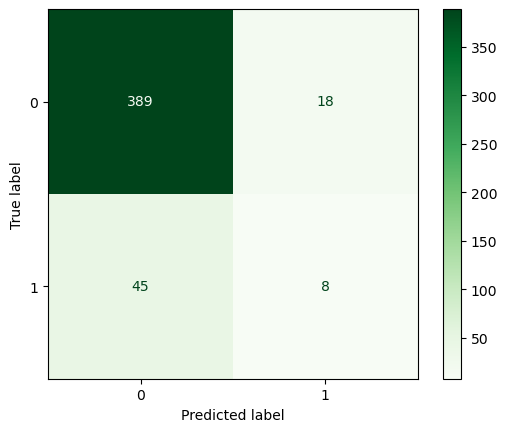

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Greens", values_format='')